<h1> EDA Sales Analysis</h1>

<h3> Import Library </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


<h3> load dataset </h3>

In [2]:
data = pd.read_csv("D:\.vscode\kodingan\EDA-Sales-Analysis\Data\supermarket_sales - Sheet1.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


<h3> Checking Missing Values </h3>
<h3> mengecek missing values</h3> 

In [5]:
miss_val = data.isnull().sum()
miss_val

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

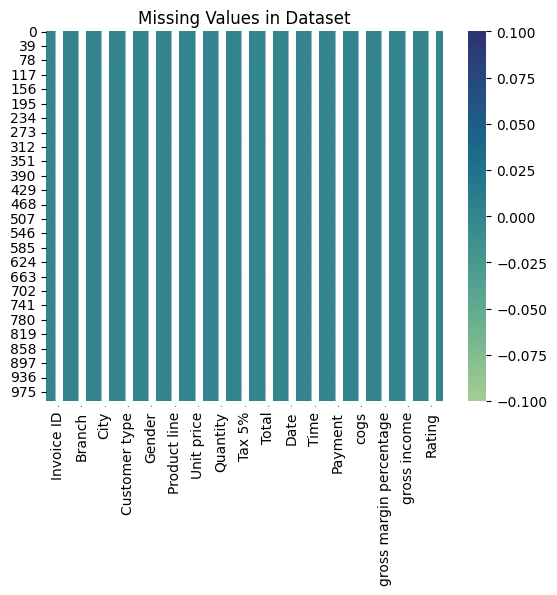

In [6]:
sns.heatmap(data.isnull(), annot=True, cmap='crest')
plt.title('Missing Values in Dataset')
plt.show()

We can see that the data set has no missing values or null data <br>
Kita bisa lihat bahwa datanya tidak mempunyai missing values atau data null.

<h3> Analisis Outliers (Outlier Detection) </h3>

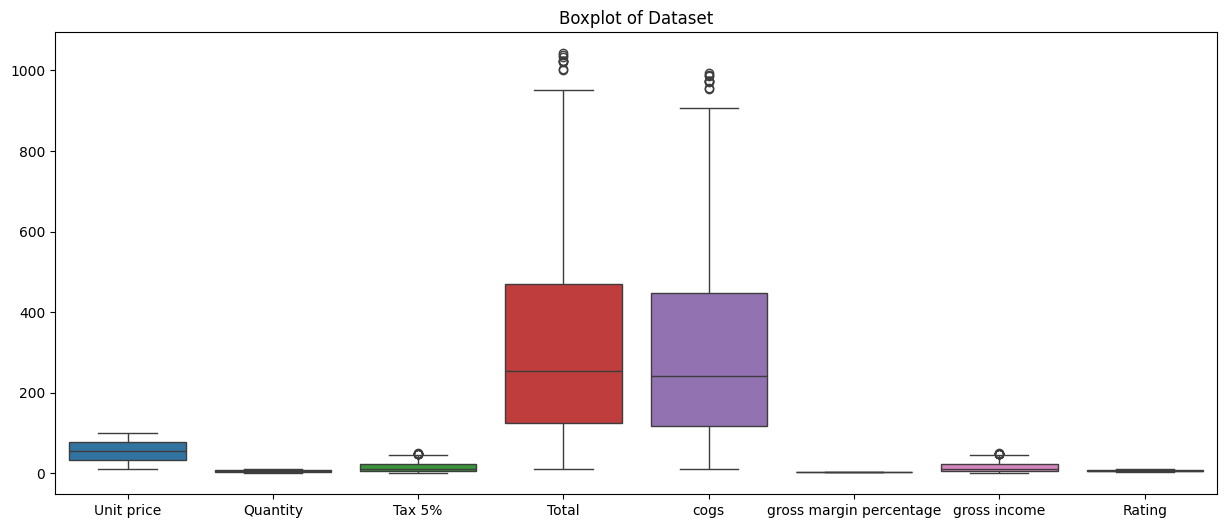

In [7]:
plt.figure(figsize=(15, 6))
sns.boxplot(data)
plt.title('Boxplot of Dataset')
plt.show()

In [8]:
from scipy import stats

data['Z-score'] = stats.zscore(data['Total'])
outliers = data[data['Z-score'].abs() > 3]
print(outliers)

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating, Z-score]
Index: []


After analyzing the boxplot, we can see that there are no outliers.<br>
setelah menganalisa boxplot dan z-score, kita bisa melihat bahwa tidak ada outlier

<h3> Segmentasi Pelanggan Berdasarkan Gender dan Pembelian </h3>
<h3> Customers Segmentation Based From Gender and Price Range </h3>

In [9]:
data['Customer type','unit price'] = pd.cut(data['Total'], bins=[0,100,500,1000, float('inf')], 
                                         labels=['Very Low', 'Low', 'Medium', 'High'])

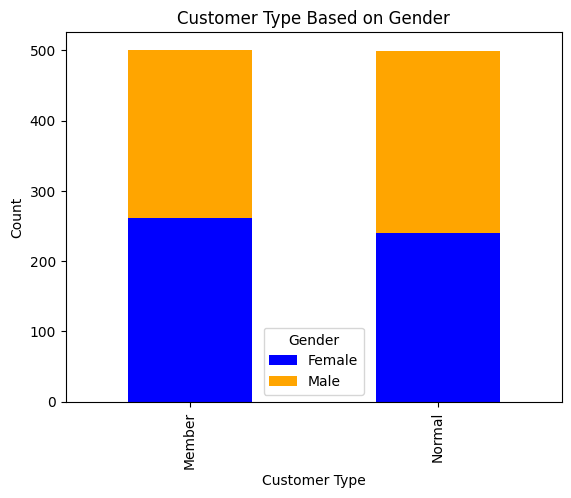

In [10]:
counts = data.groupby(['Customer type', 'Gender']).size().unstack()
counts.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Customer Type Based on Gender')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

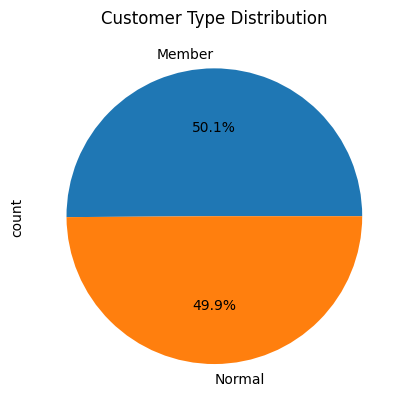

In [11]:
data['Customer type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Type Distribution')
plt.show()

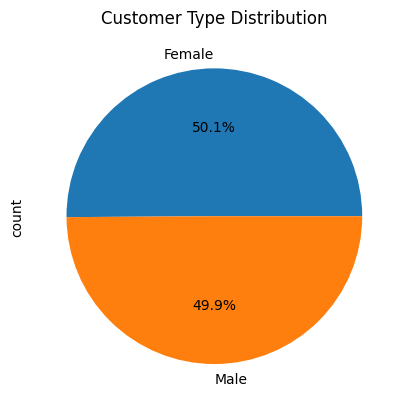

In [12]:
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Type Distribution')
plt.show()

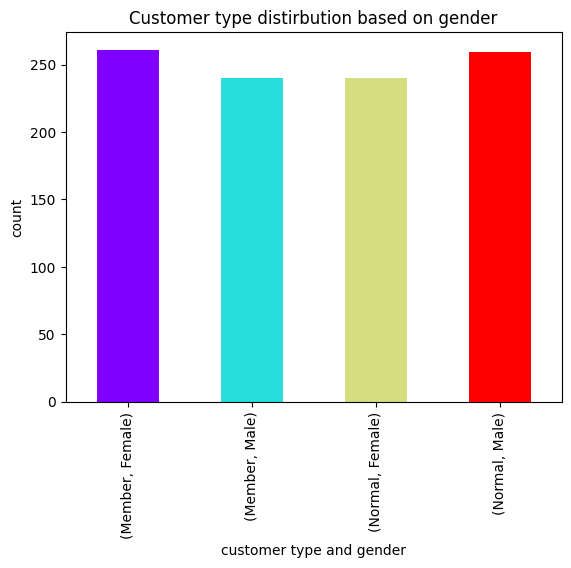

In [13]:
customer_gender_counts = data.groupby(['Customer type', 'Gender']).size()
colors = plt.cm.rainbow(np.linspace(0,1, len(customer_gender_counts)))

customer_gender_counts.plot(kind='bar', color=colors)
plt.title("Customer type distirbution based on gender")
plt.xlabel("customer type and gender")
plt.ylabel("count")
plt.show()

As we can see that there is a lot of custamers who do low buy, and more that 50% of them are members and also female.
<br> 
seperti yang bisa kita lihat bahwa banyak kustomer yang melakukan low buy atau mempunyai kemampuan untuk melakukan low buy. dan <b>lebih dari 50% kustomer tersebut adalah member dan wanita<b>

<h3> Menghitung Total Penjualan untuk Setiap Product </h3>
<h3> Counting Total Sales for Each Product </h3>

In [14]:
product_sales = data.groupby('Product line')['Total'].sum().sort_values(ascending=False)
product_sales

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

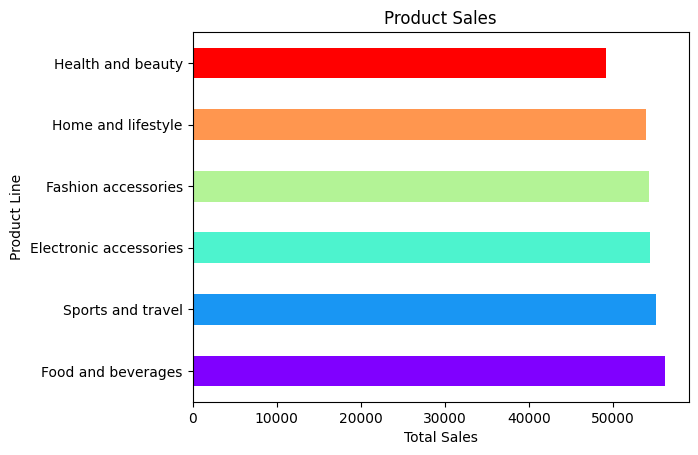

In [15]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(product_sales)))
product_sales.plot(kind='barh', color=colors)
plt.title('Product Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()

As we can see that the top selling product is food and beverages. this happend probably because of the living needs or basic needs of the customers. <br>

Seperti yang bisa kita lihat, top selling product adalah makanan dan minuman. ini terjadi karena kebutuhan hidup atau kebutuhan dasar kustomer

<h3>Analisa Harga Product</h3>
<h3>Product Price Analysis</h3>

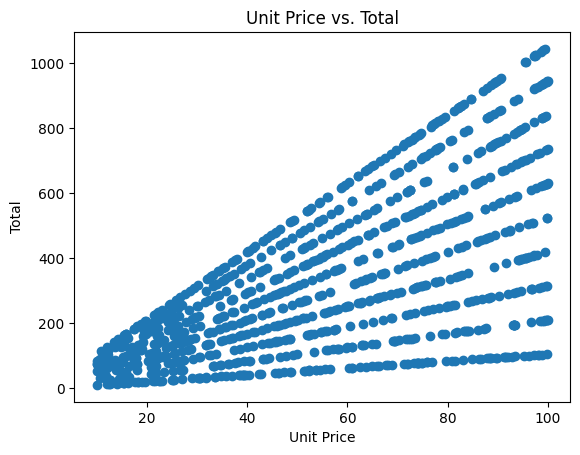

In [16]:
plt.scatter(x='Unit price', y='Total', data=data)
plt.title('Unit Price vs. Total')
plt.xlabel('Unit Price')
plt.ylabel('Total')
plt.show()

<h3> Cohort Analysis untuk Pelanggan Baru dan Pelanggan Tetap </h3>
<h3> Cohort Analysis for New and Existing Customers </h3>

identify buyyer based on time when they <br>
mengidentifikasi pembeli berdasarkan waktu saat mereka membeli

In [17]:
data['Order_date'] = pd.to_datetime(data['Date'])
data['Cohort'] = data['Order_date'].dt.to_period('M')
cohort_data = data.groupby(['Cohort', 'Customer type']).agg({'Total' : 'sum'}).reset_index()

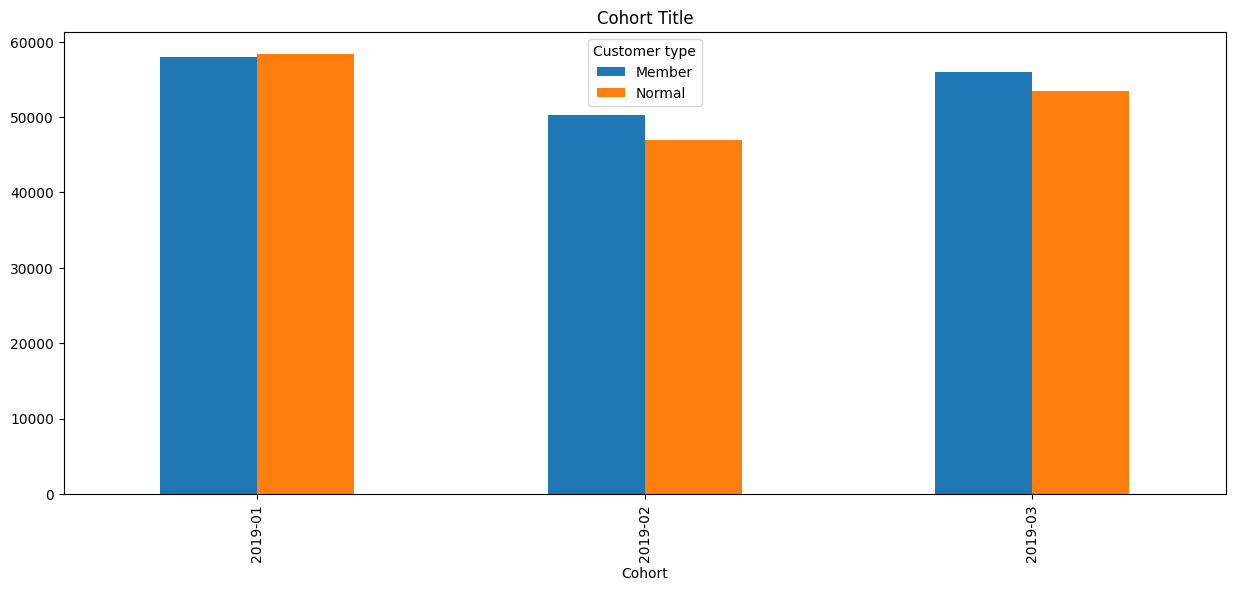

In [18]:
cohort_sales = cohort_data.pivot(index='Cohort', columns='Customer type', values='Total').plot(kind='bar', figsize=(15, 6))
plt.title('Cohort Title')
plt.show()

we can see in the first month out of the three monts. customer most likely buy things some more things maybe because its the new year so customer need new things, either for party or for new year things. <br>

and in the second month, the sales are going down a little bit, it maybe because of they still have stocks from last months. and in the third month, the sales are going up again both from the member or normal customer. <br>



Kita dapat melihat di bulan pertama dari tiga bulan tersebut, pelanggan kemungkinan besar membeli lebih banyak barang. Mungkin karena ini tahun baru, jadi pelanggan membutuhkan barang-barang baru, baik untuk pesta atau untuk keperluan tahun baru. <br>

Dan di bulan kedua, penjualan sedikit turun, mungkin karena mereka masih memiliki stok dari bulan lalu. Dan di bulan ketiga, penjualan naik kembali, baik dari anggota maupun pelanggan normal. <br>


<h3> Implementing RFM Analysis </h3>

<h3> Menerapkan/mengimplementasi Analisis RFM </h3>

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Invoice ID                   1000 non-null   object        
 1   Branch                       1000 non-null   object        
 2   City                         1000 non-null   object        
 3   Customer type                1000 non-null   object        
 4   Gender                       1000 non-null   object        
 5   Product line                 1000 non-null   object        
 6   Unit price                   1000 non-null   float64       
 7   Quantity                     1000 non-null   int64         
 8   Tax 5%                       1000 non-null   float64       
 9   Total                        1000 non-null   float64       
 10  Date                         1000 non-null   object        
 11  Time                         1000 non-null  

In [20]:

data['Date'] = pd.to_datetime(data['Date'])
data['Order_date'] = pd.to_datetime(data['Order_date'])

# Combining Customer type and Gender
data['rfm_cust'] = data['Customer type'] + ' - ' + data['Gender']

# Counting RFM based on combination
rfm = data.groupby('rfm_cust').agg({
    'Order_date': lambda x: (data['Order_date'].max() - x.max()).days,  # Recency
    'Total': 'sum',                                                    # Monetary
    'Invoice ID': 'count'                                              # Frequency
}).rename(columns={
    'Order_date': 'Recency',
    'Total': 'Monetary',
    'Invoice ID': 'Frequency'
})

# Menampilkan hasil RFM
print(rfm.head())


                 Recency    Monetary  Frequency
rfm_cust                                       
Member - Female        0  88146.9435        261
Member - Male          0  76076.5005        240
Normal - Female        0  79735.9815        240
Normal - Male          0  79007.3235        259


In [21]:
# segmentasi 

rfm['RFM_segment'] = rfm.apply(lambda x: f"{x['Recency']}-{x['Frequency']}-{x['Monetary']}", axis = 1)



In [22]:
def rfm_segment(row):
    if row['Recency'] <= rfm['Recency'].quantile(0.25) and row['Frequency'] <= rfm['Frequency'].quantile(0.75) and row['Monetary'] <= rfm['Monetary'].quantile(0.75):
        return "Best Customers"
    
    elif row['Recency'] <= rfm['Recency'].quantile(0.5) and row['Frequency'] <= rfm['Frequency'].quantile(0.5) and row['Monetary'] <= rfm['Monetary'].quantile(0.5):
        return "Loyal Customers"

    elif row['Recency'] <= rfm['Recency'].quantile(0.75):
        return "At Risk"
    else : 
        return "others"


rfm['Segment'] = rfm.apply(rfm_segment, axis = 1)  

rfm.head()

,Recency,Monetary,Frequency,RFM_segment,Segment
rfm_cust,,,,,
Member - Female,0,88146.9435,261,0.0-261.0-88146.9435,At Risk
Member - Male,0,76076.5005,240,0.0-240.0-76076.5005,Best Customers
Normal - Female,0,79735.9815,240,0.0-240.0-79735.9815,Best Customers
Normal - Male,0,79007.3235,259,0.0-259.0-79007.3235,Best Customers


<h4> Visualisasi Segmentasi RFM </h4>
<h4> Visualize Segmentation RFM </h4>

C:\Users\ANGELO\AppData\Local\Temp\ipykernel_2868\4023728477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=rfm, palette='viridis', order=rfm['Segment'].value_counts().index)


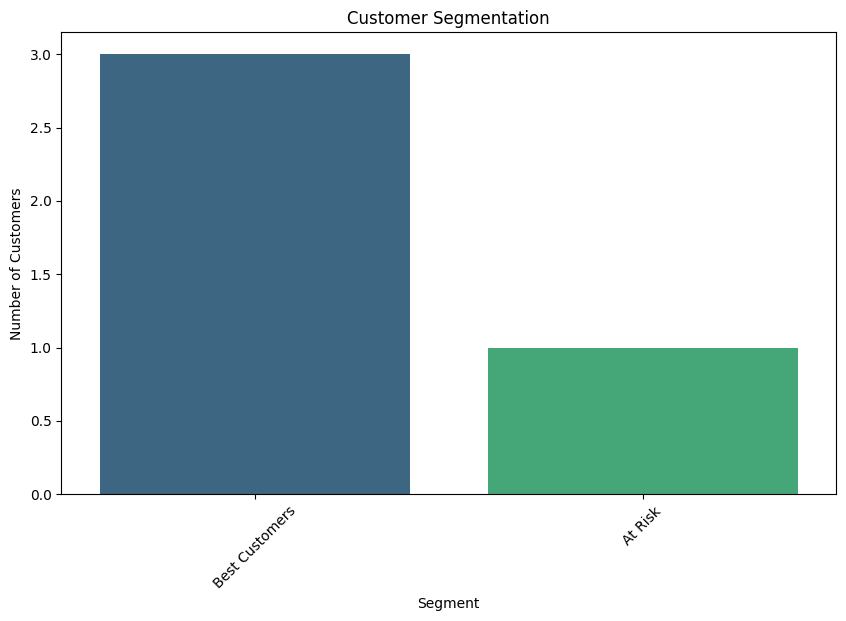

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=rfm, palette='viridis', order=rfm['Segment'].value_counts().index)
plt.title("Customer Segmentation")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()



hubungan RFM / RFM Analysis

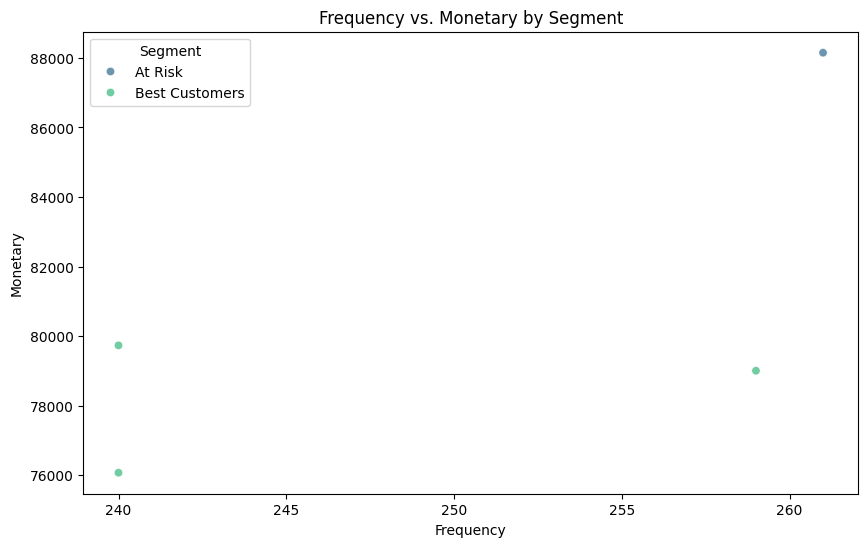

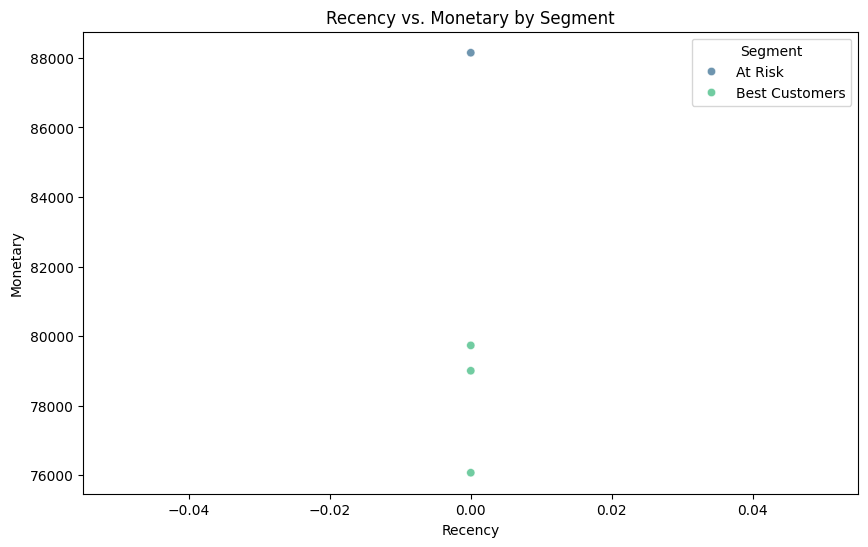

In [25]:
# Scatter plot antara Frequency dan Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='viridis', alpha=0.7)
plt.title('Frequency vs. Monetary by Segment')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

# Scatter plot antara Recency dan Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='viridis', alpha=0.7)
plt.title('Recency vs. Monetary by Segment')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

dari visualisasi tersebut dapat kita simpulkan bahwa, best customer adalah pelanggan yasng secara teratur dan menghasilkan pendapatan tinggi, sedangkan yang at risk adalah pelanggan yang tidak secara teratur dan melakukan pembelian rendah atau menghasilkan pendapatan rendah. <br>


strategi retensi dapat difokuskan pada pelanggan pada segmen "at risk" untuk meningkatkan frekuensi dan total pembelian mereka.
<br>

From the visualization, we can conclude that the "Best Customers" are those who purchase regularly and generate high revenue, while those "At Risk" are customers who purchase less frequently and generate low revenue. <br>

Retention strategies can be focused on the "At Risk" segment to increase their purchase frequency and total spending.








<h3> Analisa Per Daerah </h3>
<h3> Analysis by Region </h3>

In [26]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Z-score,"(Customer type, unit price)",Order_date,Cohort,rfm_cust
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,0.919607,Medium,2019-01-05,2019-01,Member - Female
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,-0.987730,Very Low,2019-03-08,2019-03,Normal - Female
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,0.071446,Low,2019-03-03,2019-03,Normal - Male
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,0.675780,Low,2019-01-27,2019-01,Member - Male
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,1.267125,Medium,2019-02-08,2019-02,Normal - Male


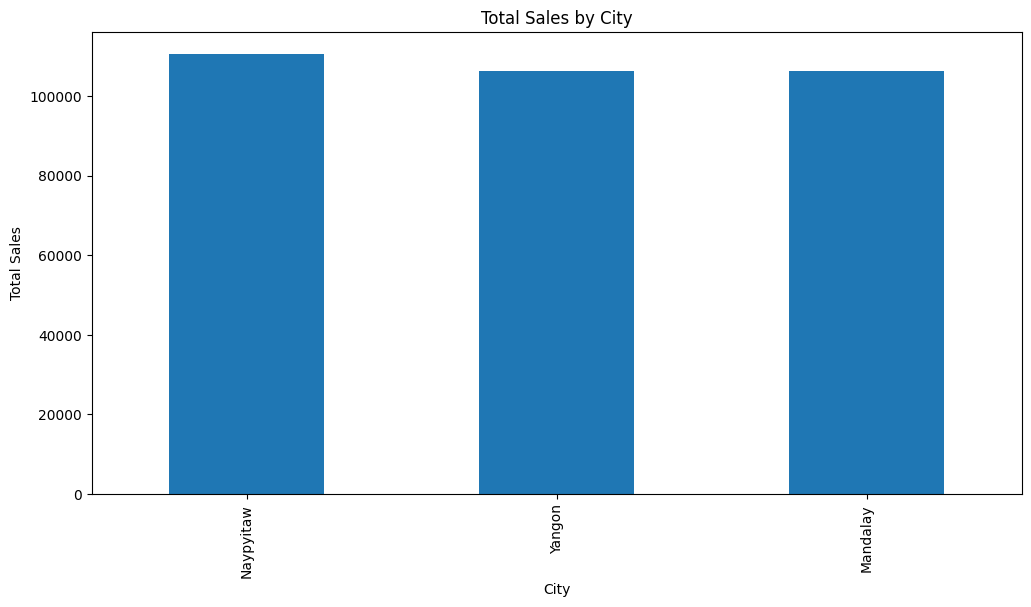

In [36]:
geo_sales = data.groupby(['City'])['Total'].sum().sort_values(ascending=False)
geo_sales.plot(kind="bar", stacked=False, figsize=(12, 6))
plt.title("Total Sales by City")
plt.xlabel("City")
plt.ylabel("Total Sales")

plt.show()




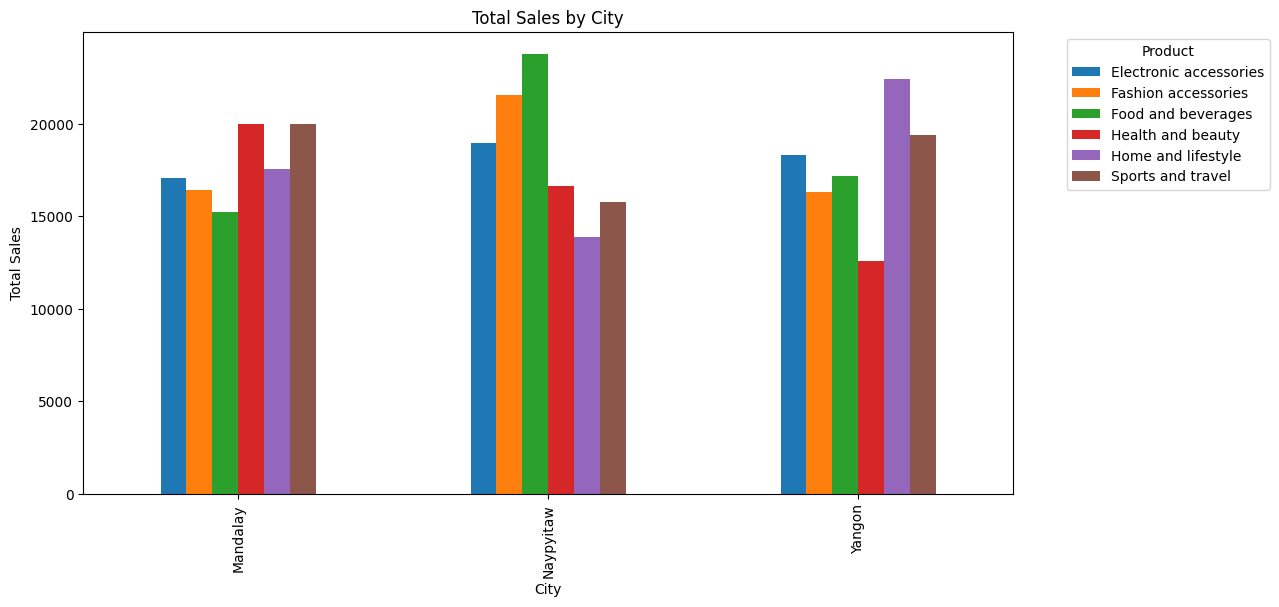

In [35]:
geo_sales = data.groupby(['City', 'Product line'])['Total'].sum().sort_values(ascending=False).unstack()
geo_sales.plot(kind="bar", stacked=False, figsize=(12, 6))
plt.title("Total Sales by City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




seperti yang bisa di lihat, kota yang paling banyak penghasilannya adalah Naypyitaw, yang mana kota tersebut memiliki banyak penghasilan dari produk makanan dan minuman.

<br>
As you can see, the city with the highest revenue is Naypyitaw, which generates a significant amount of income from food and beverage products.

<h3> Analisa Tren Waktu </h3>
<h3> Analysis by Time </h3>

In [37]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Z-score,"(Customer type, unit price)",Order_date,Cohort,rfm_cust
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,0.919607,Medium,2019-01-05,2019-01,Member - Female
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,-0.987730,Very Low,2019-03-08,2019-03,Normal - Female
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,0.071446,Low,2019-03-03,2019-03,Normal - Male
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,0.675780,Low,2019-01-27,2019-01,Member - Male
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,1.267125,Medium,2019-02-08,2019-02,Normal - Male


analisa per hari / daily analysis

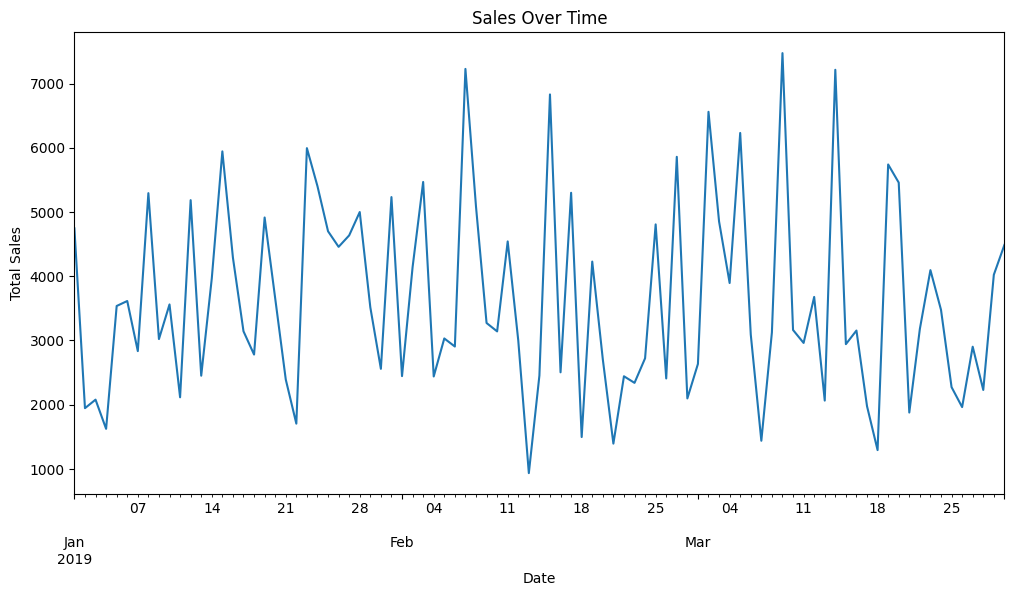

In [40]:
data["Order_date"] = pd.to_datetime(data["Order_date"])
sales_per_day = data.resample("D", on="Order_date")["Total"].sum()

sales_per_day.plot(kind="line", figsize=(12, 6))
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

analisa perbulan / monthly analysis

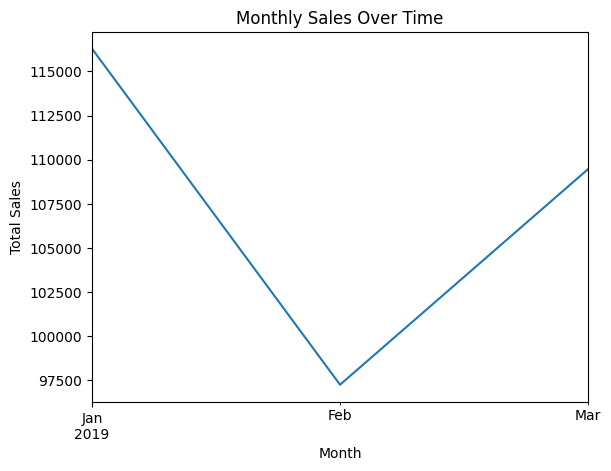

In [41]:
sales_per_day.resample('M').sum().plot(kind='line')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

jika dilihat dari grafik tersebut, penjulan menurun pada bulan janurai menuju ferbuari dan naik pada bulan ferbuari menuju maret.